In [1]:
pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install tqdm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:

pip install --upgrade opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_path = 'Dataset/TRAIN'
test_path = 'Dataset/TEST'


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob





2025-01-24 11:05:07.883378: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-24 11:05:08.138252: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-24 11:05:08.375511: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737696908.629532    4678 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737696908.688478    4678 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-24 11:05:09.224769: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [ ]:
import os

x_data=[]
y_data=[]
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')  # Add other supported formats as needed


for category in glob(train_path+'/*'):
 for file in tqdm(glob(category + '/*')):
    if file.lower().endswith(valid_extensions):
        img_array = cv2.imread(file)
        if img_array is not None:
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            x_data.append(img_array)
            y_data.append(category.split('/')[-1])


data=pd.DataFrame({'image':x_data,'label':y_data})
        
    


100%|██████████| 12565/12565 [00:25<00:00, 496.54it/s]


In [11]:
data.shape

(22484, 2)

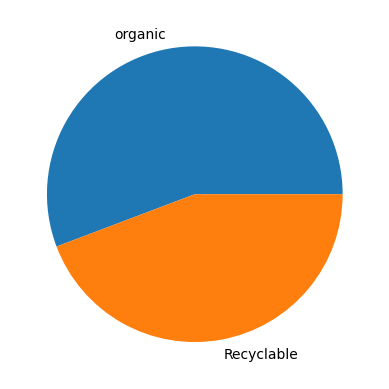

In [12]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['organic','Recyclable'])
plt.show()

label
O    12537
R     9947
Name: count, dtype: int64
['O', 'R']


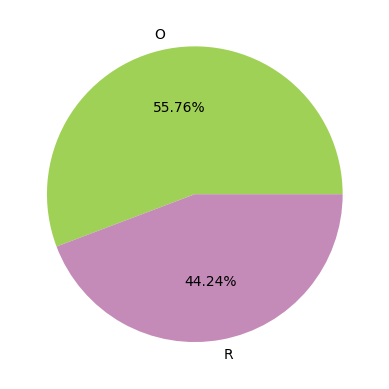

In [14]:
import matplotlib.pyplot as plt

# Get the value counts for the labels
label_counts = data['label'].value_counts()
print(label_counts)

# Use the unique labels dynamically instead of hardcoding
labels = label_counts.index.tolist()
print(labels)
# Plot the pie chart
plt.pie(label_counts, labels=labels, colors=['#a0d157','#c48bb8'],autopct='%0.2f%%', )
plt.show()


In [15]:
print(f"Total images processed: {len(x_data)}")
print(f"Categories found: {set(y_data)}")


Total images processed: 22484
Categories found: {'R', 'O'}


In [16]:
avg_height = np.mean([img.shape[0] for img in img_array])
avg_width = np.mean([img.shape[1] for img in img_array])
print(f"Average image dimensions: {avg_height:.2f}x{avg_width:.2f}")

print(f"Category with the most images: {label_counts.idxmax()} ({label_counts.max()} images)")
print(f"Category with the least images: {label_counts.idxmin()} ({label_counts.min()} images)")


Average image dimensions: 275.00x3.00
Category with the most images: O (12537 images)
Category with the least images: R (9947 images)


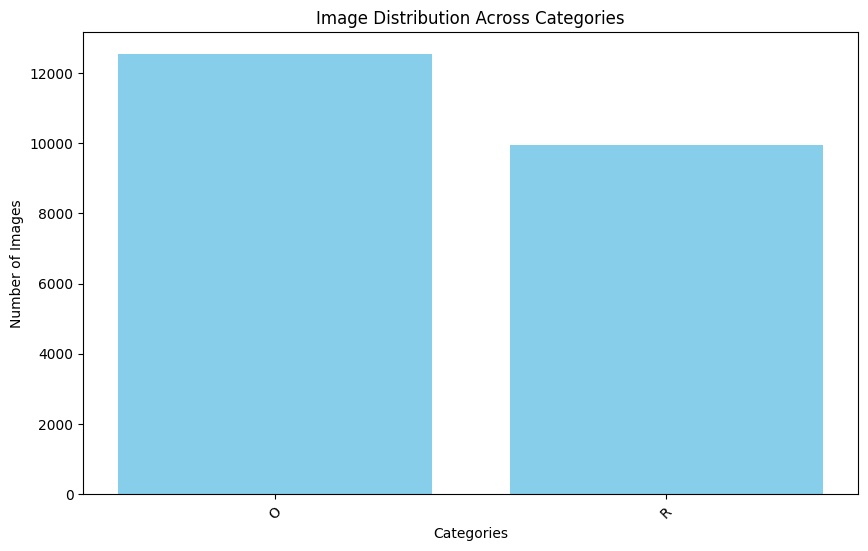

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Image Distribution Across Categories')
plt.xticks(rotation=45)
plt.show()


In [21]:
import streamlit as st

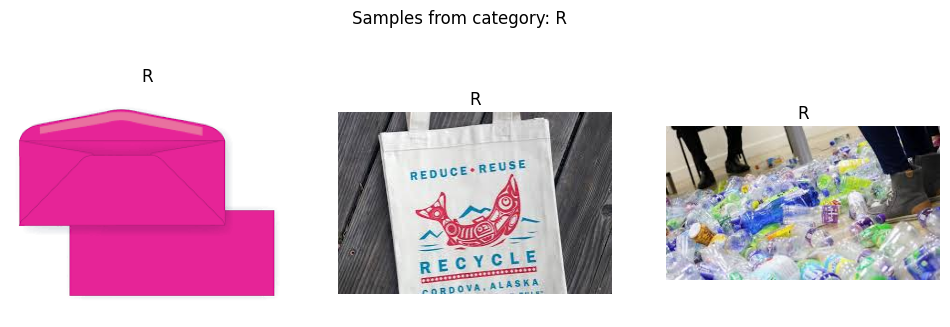

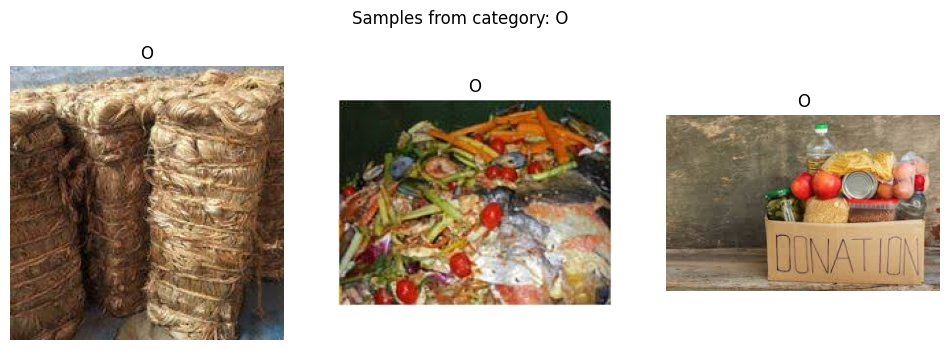

In [25]:
import random

def show_samples_by_category(data, num_samples=3):
    categories = data['label'].unique()
    for category in categories:
        category_images = data[data['label'] == category]['image'].tolist()
        sampled_images = random.sample(category_images, min(len(category_images), num_samples))
        plt.figure(figsize=(12, 4))
        for i, img in enumerate(sampled_images):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img)
            plt.title(category)
            plt.axis('off')
        plt.suptitle(f"Samples from category: {category}")
        plt.show()

show_samples_by_category(data)


In [27]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Resize and normalize images using Scikit-learn
def preprocess_images(images, target_size=(128, 128)):
    resized_images = [
        cv2.resize(img, target_size, interpolation=cv2.INTER_AREA) for img in images
    ]
    resized_images = np.array(resized_images)
    # Normalize pixel values to 0-1 range
    scaler = MinMaxScaler()
    flattened_images = resized_images.reshape(resized_images.shape[0], -1)
    normalized_images = scaler.fit_transform(flattened_images).reshape(resized_images.shape)
    return normalized_images

# Apply preprocessing
preprocessed_images = preprocess_images(img_array)
print(f"Processed image shape: {preprocessed_images.shape}")


Processed image shape: (183, 128, 128)


In [30]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Flatten images for PCA
flattened_images = preprocessed_images.reshape(preprocessed_images.shape[0], -1)

# Apply PCA
pca = PCA(n_components=50)
reduced_features = pca.fit_transform(flattened_images)

# Apply K-Means clustering
num_clusters = len(np.unique(labels))  # Cluster count = number of classes
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(reduced_features)

print(f"PCA explained variance ratio: {sum(pca.explained_variance_ratio_):.2f}")
print(f"Cluster assignments: {clusters}")


PCA explained variance ratio: 0.95
Cluster assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [34]:
from sklearn.utils import resample

# Create a balanced dataset by oversampling
def balance_classes(images, labels):
    balanced_images, balanced_labels = [], []
    unique_classes = np.unique(labels)
    
    for cls in unique_classes:
        cls_images = [img for img, label in zip(images, labels) if label == cls]
        cls_labels = [label for label in labels if label == cls]
        
        if len(cls_images) < max(np.bincount(labels)):
            # Oversample minority class
            resampled_images, resampled_labels = resample(
                cls_images,
                cls_labels,
                replace=True,
                n_samples=max(np.bincount(labels)),
                random_state=42,
            )
            balanced_images.extend(resampled_images)
            balanced_labels.extend(resampled_labels)
        else:
            balanced_images.extend(cls_images)
            balanced_labels.extend(cls_labels)
    
    return np.array(balanced_images), np.array(balanced_labels)

balanced_images, balanced_labels = balance_classes(preprocessed_images, encoded_labels)
print(f"Balanced dataset shape: {balanced_images.shape}")


Balanced dataset shape: (2, 128, 128)
